# Plot LabChart Recordings

### This notebook will help you explore and plot any exported .mat file from LabChart.

To run this, you will need to upload an exported .mat file from LabChart into your DataHub. [Follow this instructions on how to export your data as a .mat file](https://docs.google.com/document/d/1nscGwk4ZoLGoE1HhwHiOv8XimzUQ80RTLfwSNeMRO6E/edit#heading=h.njfsdrg02rx).

You can either export a selection of data (Option 1 below) or an entire experiment file (Option 2 below). In either case, **you should only be exporting your recorded channel.**

>**Task**: Run the cell below to import our necessary packages and configure the notebook environment.

In [5]:
# Import our packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# Decide if you want plots to be interactive or not
# Set interactive to False if you do not want interaction
interactive = True

if interactive:
    print('Figures are interactive.')
    # Set up interactive matplot lib and define a function to interact with plots
    %matplotlib nbagg
    def onclick(event):
        pos.append([event.xdata,event.ydata])

else:
    print('Figures are not interactive.')
    %matplotlib inline 
    %config InlineBackend.figure_format = 'retina'

print('Packages imported.')


Figures are interactive.
Packages imported.


> **Task**: Change the filename below to your file.

In [10]:
# Change the filename to EXACTLY match your file
filename = 'EarthwormCAPs.mat'

data = loadmat(filename)['data'][0]
dataend = loadmat(filename)['dataend']
datastart = loadmat(filename)['datastart']

# Get the sampling rate and can create a time axis for our data
# Ensure that this matches the sampling rate of your recording!
sampling_rate = 40000
timestamps = (np.arange(0, len(data)) * (1.0 / sampling_rate))*1000

print('Data imported.')
print('Data was sampled at', sampling_rate, 'Hz.')

Data imported.
Data was sampled at 40000 Hz.


## Option 1: Analyzing a selection of data
Use the code below if you exported a **selection** of data, not a complete file.

#### Using the interactive plot
The x (time, in ms) and y (voltage, in volts) position of your cursor will update in the bottom left corner. You can use these values to make your calculations, if necessary. You can create a box to Zoom into using the Zoom button below, and return to the home view using the Home button. The crosshairs button will allow you to pan through the recording.

<IPython.core.display.Javascript object>


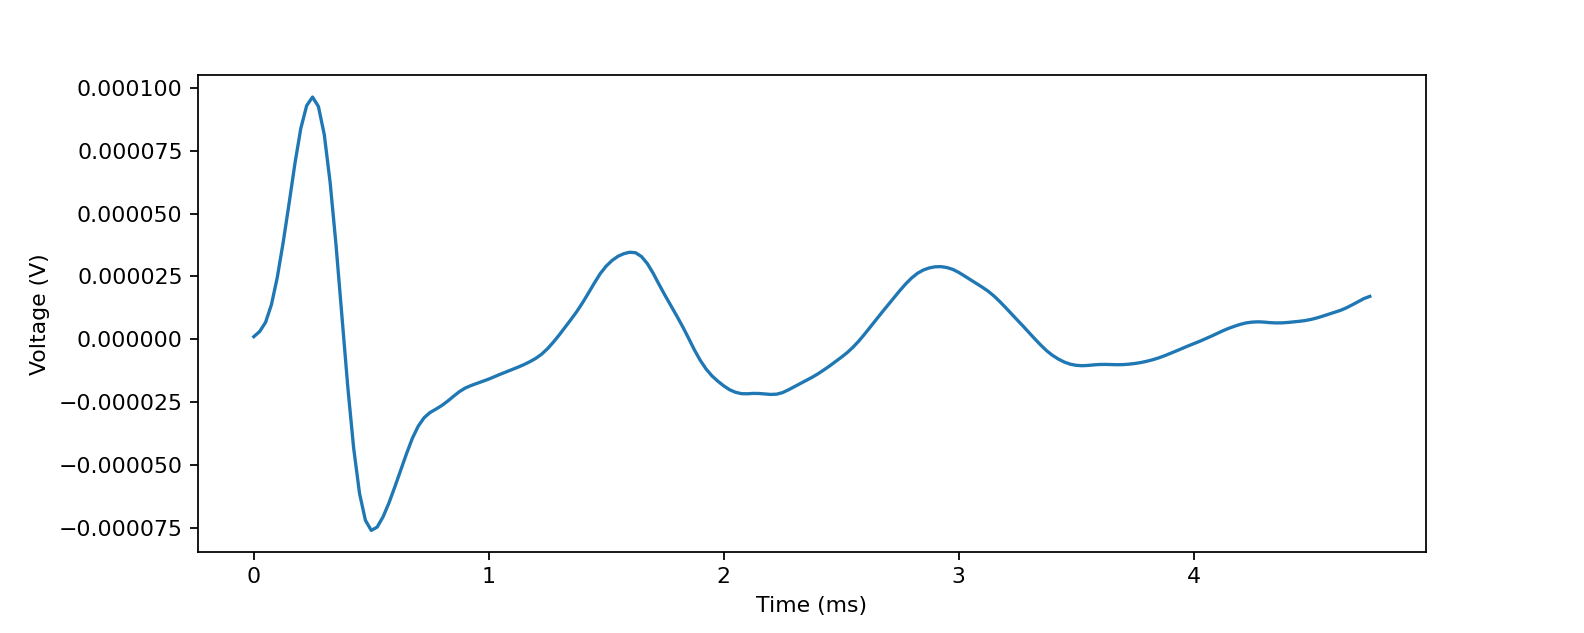

In [7]:
# set up figure & plt
fig,ax = plt.subplots(figsize=(10,4))

plt.plot(timestamps,data)

# You may need to change the x label
plt.xlabel('Time (ms)') 

# You may need to change the y label
plt.ylabel('Voltage (V)') 

# This makes the axis labels print without scientific notation
ax.ticklabel_format(useOffset=False, style='plain') 

# You can uncomment the line below to restrict the x axis plotting
#plt.xlim([200,700])

plt.show()

## Option 2: Analyze "scope view" style trial data
Use this option if you recorded many pages in scope view and exported the entire file as a .mat. You can change the trial # below where it says `this_trial` to flip through different trials of your data.

In [ ]:
# Change the trial below
this_trial = 20

trial_voltage = data[int(datastart[0,this_trial]):int(dataend[0,this_trial])]
trial_timestamps = timestamps[int(datastart[0,this_trial]):int(dataend[0,this_trial])]
trial_timestamps -= trial_timestamps[0]

# Set up figure and plot
fig,ax = plt.subplots(figsize=(10,4),sharex=True)
plt.plot(trial_timestamps,trial_voltage)
plt.xlabel('Time (ms)')
#plt.legend(['Response'])
plt.ylabel('Voltage (V)')

# Change the x axis limits
#plt.xlim([0,600])
 
fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()